# Classificar se um indivíduo é ou não portador da diabetes
## Definição do problema:
### O conjunto de dados contém várias informações sobre pessoas indianas:
1. Número de vezes grávida
2. Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. espessura de dobra de pele de tríceps (mm)
5. Insulina sérica de 2 horas (mu U / ml)
6. Índice de massa corporal (peso em kg / (altura em m) ^ 2)
7. Função de pedigree de diabetes
8. Idade (anos)
9. Variável de classe (0 ou 1)

## Importação das bibliotecas

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

## Carregando e definindo as colunas do dataset

In [27]:
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('diabetes.data', header=None, names=cols)

## Visualização e descrição dos dados

In [28]:
df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
print(df.groupby('age').size())

age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64


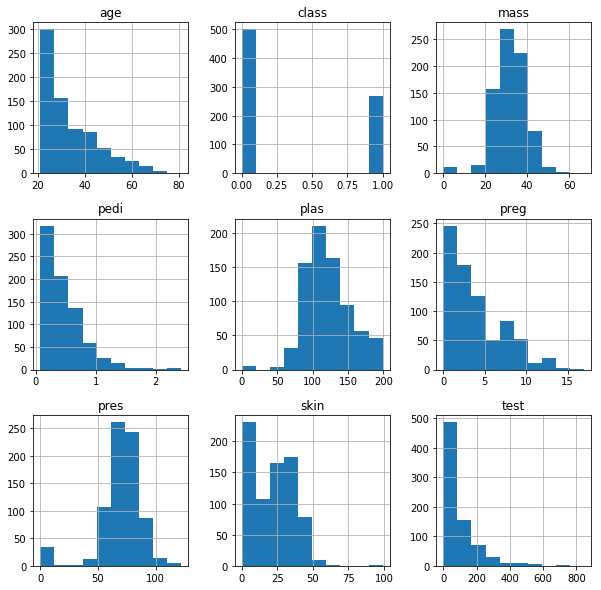

In [31]:
df.hist(figsize=(10,10));

In [32]:
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [33]:
df = df.values
print(df)
np.random.seed(1)
np.random.shuffle(df)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


## Criação do dataset

In [34]:
dados = df[:, 0:8]
diabetes = df[:, 8]

In [35]:
n_train = int(len(diabetes) * 0.75)
dados_treino = dados[:n_train,:]
diabetes_treino = diabetes[:n_train]
dados_teste = dados[n_train:,:]
diabetes_teste = diabetes[n_train:]

In [36]:
dados.shape, diabetes.shape, dados_treino.shape, diabetes_treino.shape, dados_teste.shape, diabetes_teste.shape

((768, 8), (768,), (576, 8), (576,), (192, 8), (192,))

## Criando uma árvore de decisão e fazendo a ligação entre os dados

In [37]:
clf = tree.DecisionTreeClassifier()
clf.fit(dados_treino, diabetes_treino)
resposta = clf.predict(dados_teste)

## Resultados

In [38]:
print(metrics.classification_report(diabetes_teste, resposta))

             precision    recall  f1-score   support

        0.0       0.72      0.79      0.75       121
        1.0       0.57      0.48      0.52        71

avg / total       0.66      0.67      0.67       192



In [39]:
accuracy = metrics.accuracy_score(diabetes_teste, resposta)
print(accuracy)

0.671875
